# Perceptron

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


## Dataset

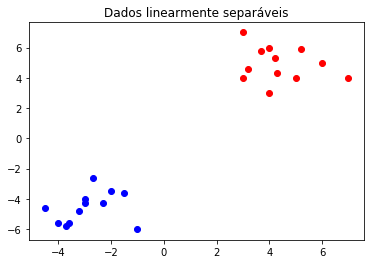

In [2]:
class1 = [(3, 4), (4.2, 5.3), (4, 3), (6, 5), (4, 6), (3.7, 5.8),
          (3.2, 4.6), (5.2, 5.9), (5, 4), (7, 4), (3, 7), (4.3, 4.3) ] 

class2 = [(-3, -4), (-2, -3.5), (-1, -6), (-3, -4.3), (-4, -5.6), 
          (-3.2, -4.8), (-2.3, -4.3), (-2.7, -2.6), (-1.5, -3.6), 
          (-3.6, -5.6), (-4.5, -4.6), (-3.7, -5.8) ]

X, Y = zip(*class1)
plt.scatter(X, Y, c="r")
X, Y = zip(*class2)
plt.scatter(X, Y, c="b")
plt.title('Dados linearmente separáveis')
plt.show()

In [3]:
#w = [0, 0, 0]
#x = [0,1,-2]

x = np.array(class1 + class2)
#print (x)
#print (type(X), type(w))

ni= 0.1 #Deve ser cte, positivo e menor que 1.
w = np.zeros(len(X))

    
#y = np.dot(np.transpose(w), X)
#print (len(y))

def Perceptron(x, ni):
    
    def signum_function(x):
        if x <= 0:
            return -1
        return 1
    
    w = np.zeros(len(x))
    
    w1 = []
    D = []
    
    for n in range(len(x)-1):
        y = signum_function(np.dot(np.transpose(w), x))
        d = signum_function(x[n])
        D.append(d)
        e = d - y
        w[n+1] = float(w[n] + ni * x[n] * e)
        w1.append(w[n+1])
        
    v_in = w1 * x
    v_sum = v_in.sum()
    v = signum_function(v_sum)
    #print (len(w1))
    #print (v_sum)
    #print (signum_function(v_sum))
    #print (D)
    return v, D, w1

In [4]:
evaluation = Counter()

Y = []
D2 = []
W1 = []

for point in x:
    #print (point)
    y, D, w1 = Perceptron(point, ni)
    Y.append([y])
    D2.append(D)
    W1.append(w1)
    
#print (D2, Y)
#print (W1)

for i,j in zip(D2, Y):
    if Y == D2:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())

[('correct', 24)]


In [5]:
t = np.arange(-7, 8)

W1 = np.asarray(W1)

m = -(W1[0] / W1[1])
print ('m:', m)

m: [-0.71428571]


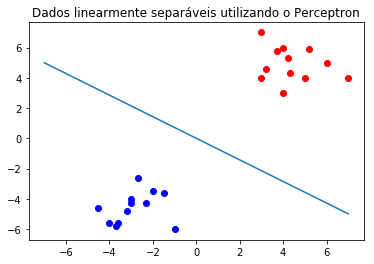

In [6]:
X, Y = zip(*class1)
plt.scatter(X, Y, c="r")
X, Y = zip(*class2)
plt.scatter(X, Y, c="b")
plt.plot(t, t*m)
plt.title('Dados linearmente separáveis utilizando o Perceptron')
plt.show()

# Conclusion

To use this dataset the perceptron works very well. But, we could have problems if the dataset was non-linear. 

# Reference

-  Neural Networks and Learning Machines. Simon Haykin. McMaster University, Canada